You are a data scientist working for a healthcare company, and you have been tasked with creating a
decision tree to help identify patients with diabetes based on a set of clinical variables. You have been
given a dataset (diabetes.csv) with the following variables:
1. Pregnancies: Number of times pregnant (integer)
2. Glucose: Plasma glucose concentration a 2 hours in an oral glucose tolerance test (integer)
3. BloodPressure: Diastolic blood pressure (mm Hg) (integer)
4. SkinThickness: Triceps skin fold thickness (mm) (integer)
5. Insulin: 2-Hour serum insulin (mu U/ml) (integer)
6. BMI: Body mass index (weight in kg/(height in m)^2) (float)
7. DiabetesPedigreeFunction: Diabetes pedigree function (a function which scores likelihood of diabetes
   based on family history) (float)
8. Age: Age in years (integer)
9. Outcome: Class variable (0 if non-diabetic, 1 if diabetic) (integer)

Here’s the dataset link:

Your goal is to create a decision tree to predict whether a patient has diabetes based on the other
variables. Here are the steps you can follow:

https://drive.google.com/file/d/1Q4J8KS1wm4-_YTuc389enPh6O-eTNcx2/view?

Q1) Import the dataset and examine the variables. Use descriptive statistics and visualizations to
understand the distribution and relationships between the variables.

Reading the Dataframe using pandas

In [2]:
# Reading Dataset from source
import pandas as pd
df = pd.read_csv('diabetes (2).csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


Shape of dataframe

In [3]:
df.shape

(768, 9)

Dataset info

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Descriptive Statistics

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


Target Variable Outcome value Counts

In [6]:
# Checking Value counts
df['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

<AxesSubplot: title={'center': 'Value Counts for Outcome'}, xlabel='Outcome', ylabel='Value Counts'>

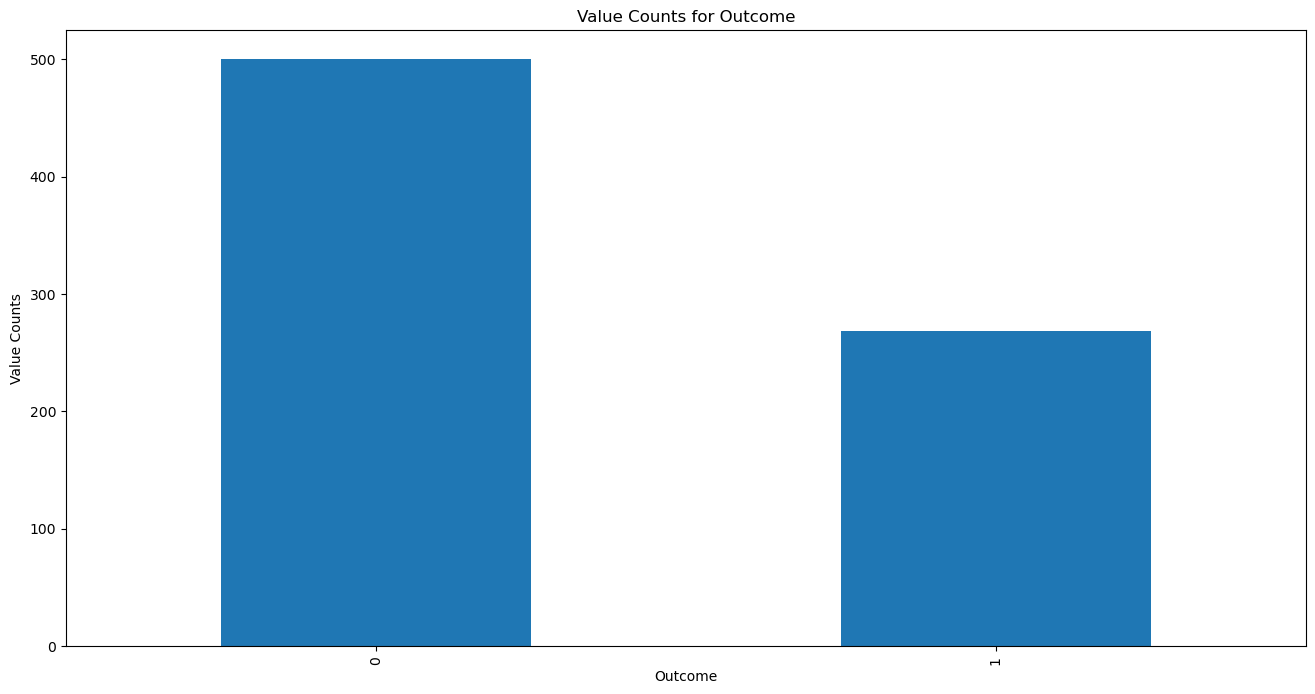

In [7]:
# Visualising Value Counts
df['Outcome'].value_counts().plot(kind='bar',
                                  xlabel='Outcome',
                                  ylabel='Value Counts',
                                  title='Value Counts for Outcome',
                                  figsize=(16,8))

Univariate Analysis


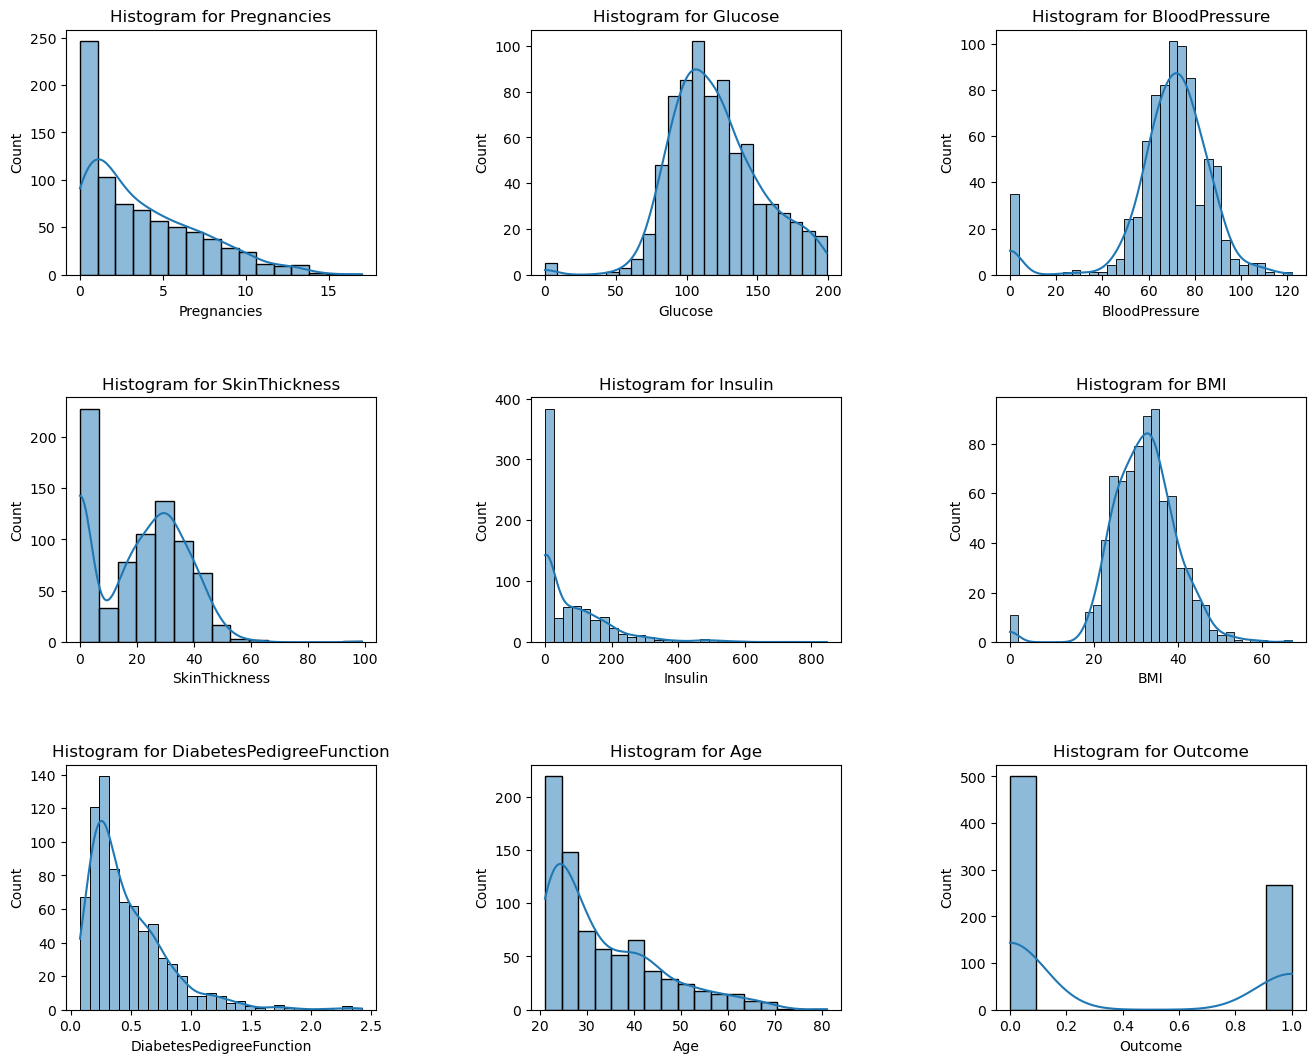

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
# Initialize counter for subplots
x = 1
plt.figure(figsize=(16,10))
plt.subplots_adjust(top = 0.99, bottom=0.01, hspace=0.5, wspace=0.5)
for i in df.columns:
    plt.subplot(3,3,x)
    x = x+1
    sns.histplot(data=df,x=i,kde='true')
    plt.title(f'Histogram for {i}')
plt.show()

Insights for above Univariate Analysis

In [ ]:
1.Glucose feature has 0 values which does not make sense, need to replace 0 values with median.
2.Skin Thickness feature also has 0 values which also does not make sense, need to replace 0 values with median.
3.Insulin feature also has 0 values which does not make sense, replace this 0 values with median.
4.BMI feature also has 0 values which does not make sense, replace this 0 values with median.
5.Blood Pressure feature has 0 values which does not make sense, replace this 0 values with median.

In [9]:
# Describe dataset by grouping by outcome
df.groupby(by='Outcome').describe().T

Outcome                     0           1
Pregnancies count  500.000000  268.000000
            mean     3.298000    4.865672
            std      3.017185    3.741239
            min      0.000000    0.000000
            25%      1.000000    1.750000
...                       ...         ...
Age         min     21.000000   21.000000
            25%     23.000000   28.000000
            50%     27.000000   36.000000
            75%     37.000000   44.000000
            max     81.000000   70.000000

[64 rows x 2 columns]

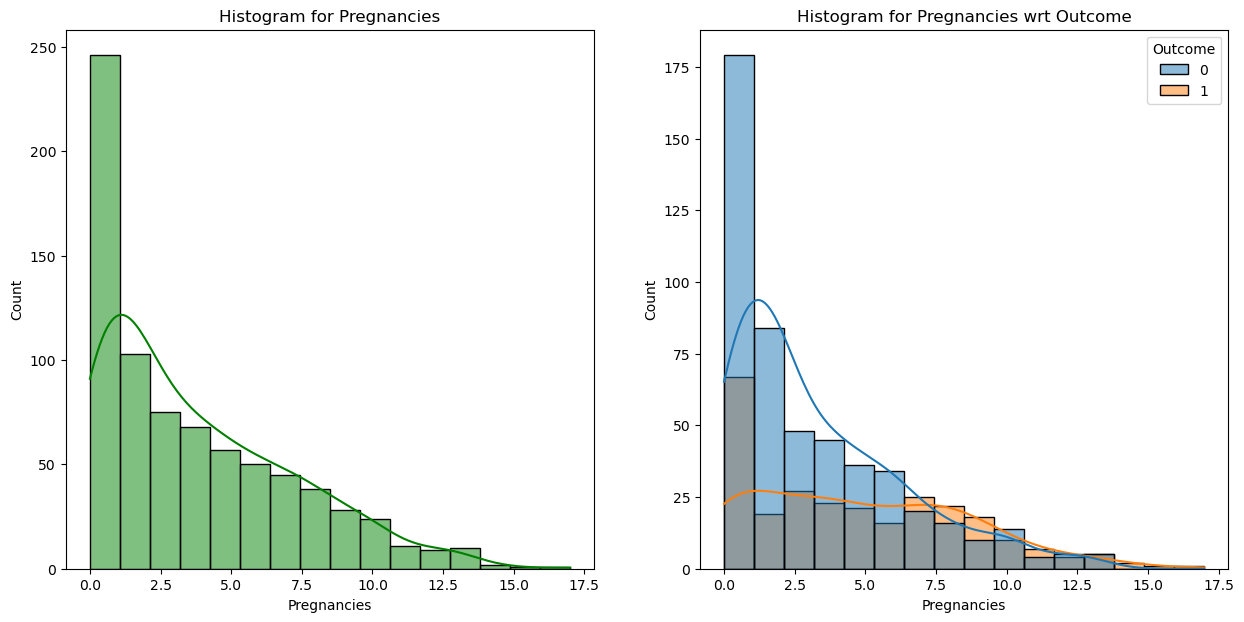

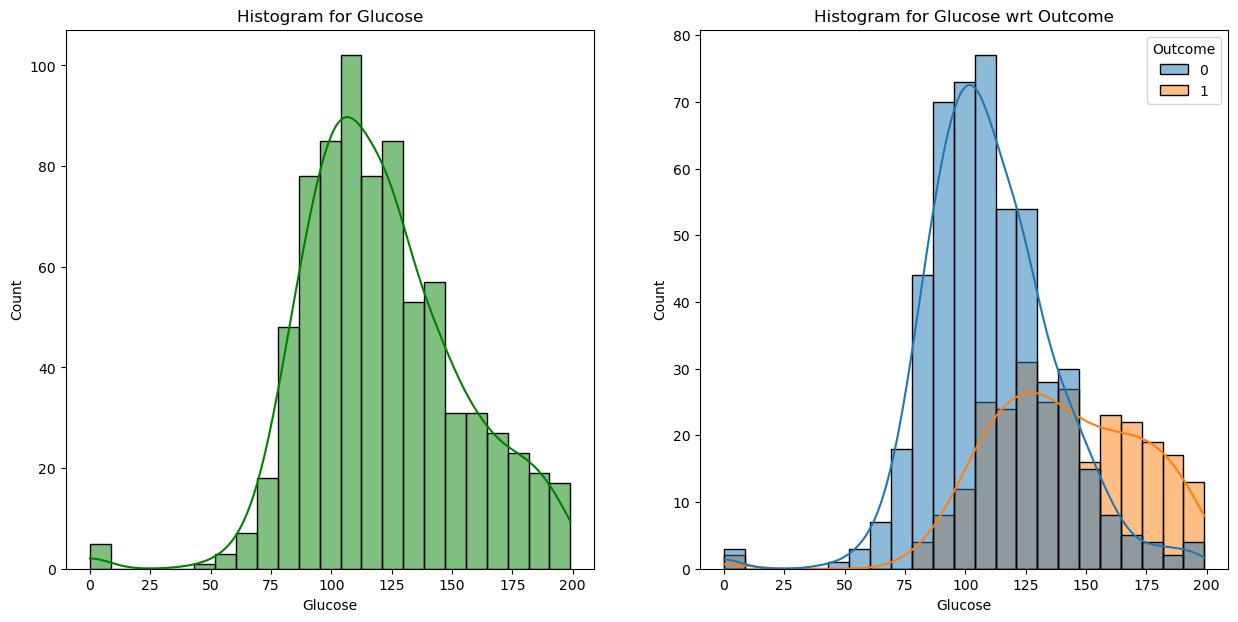

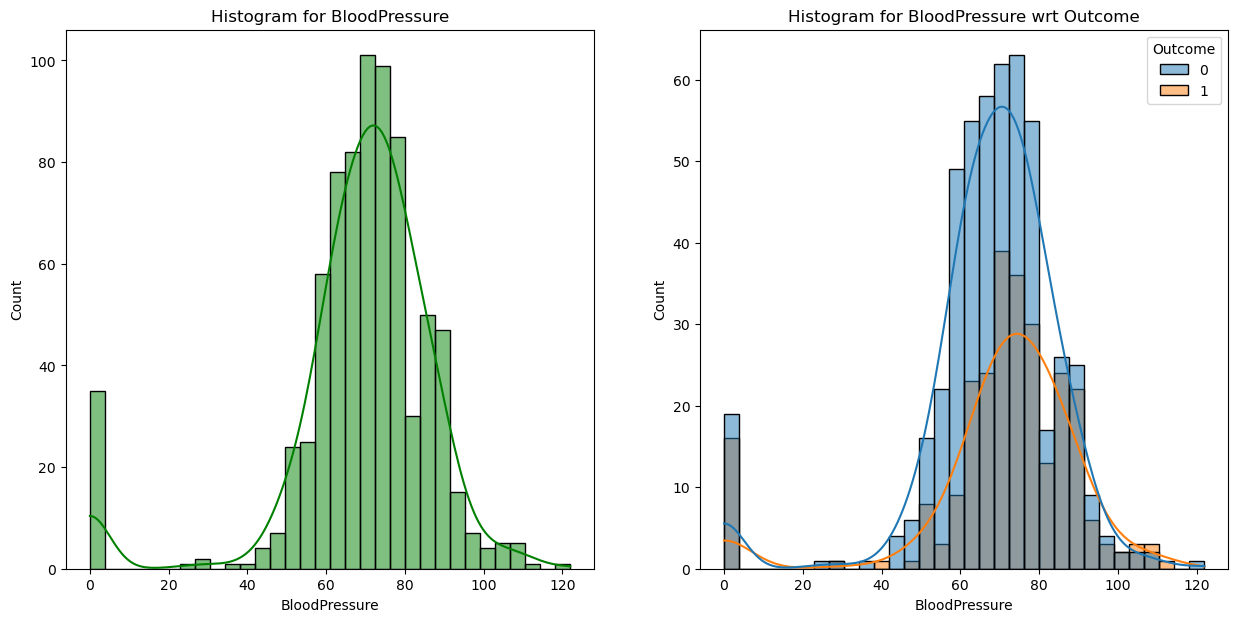

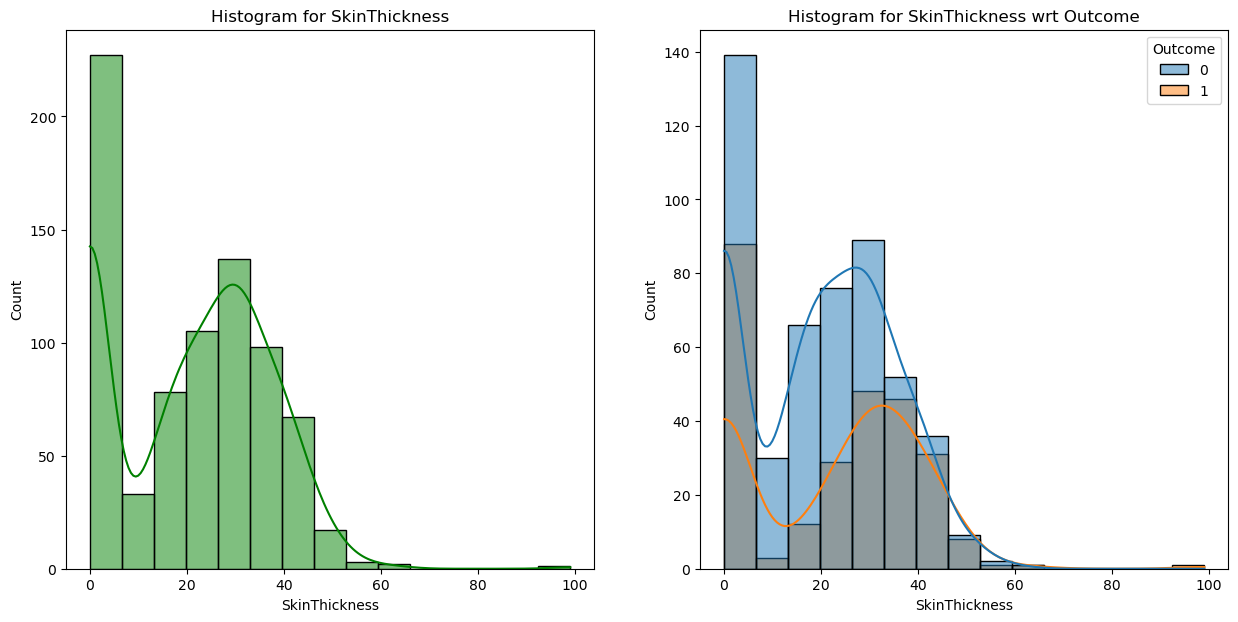

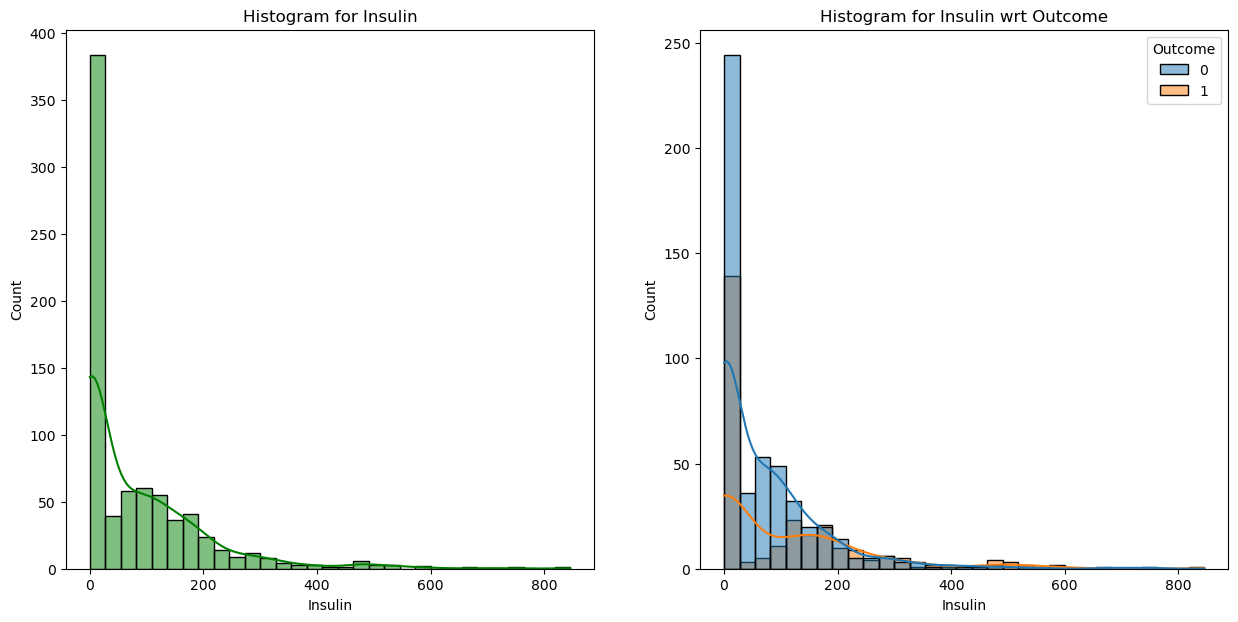

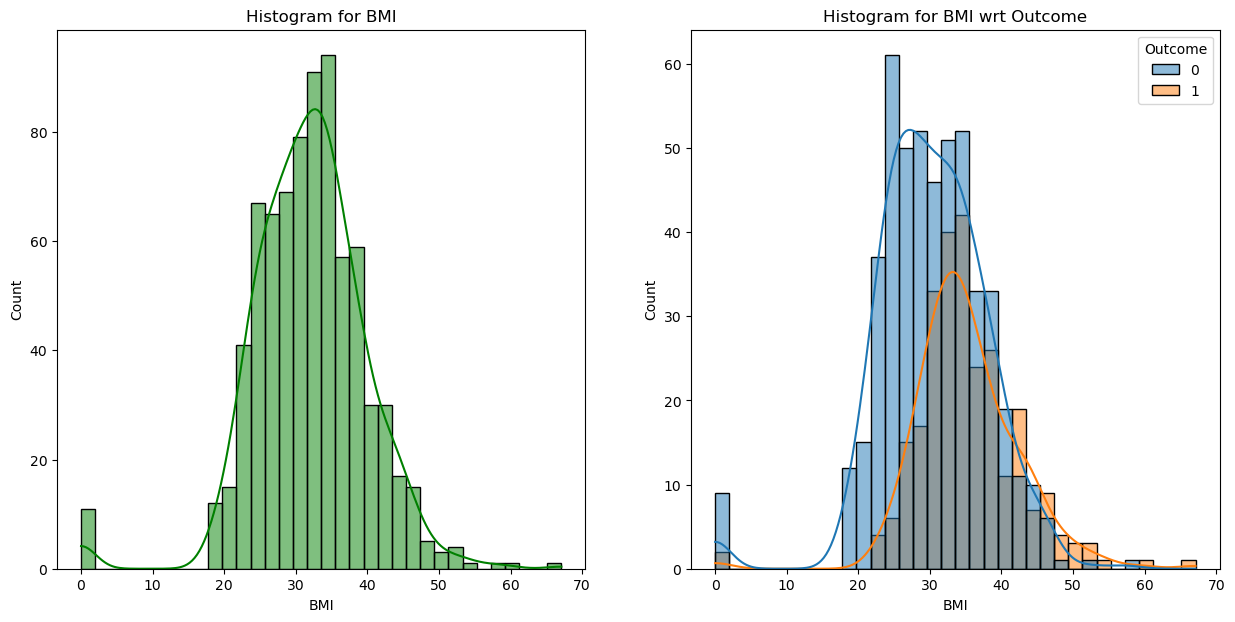

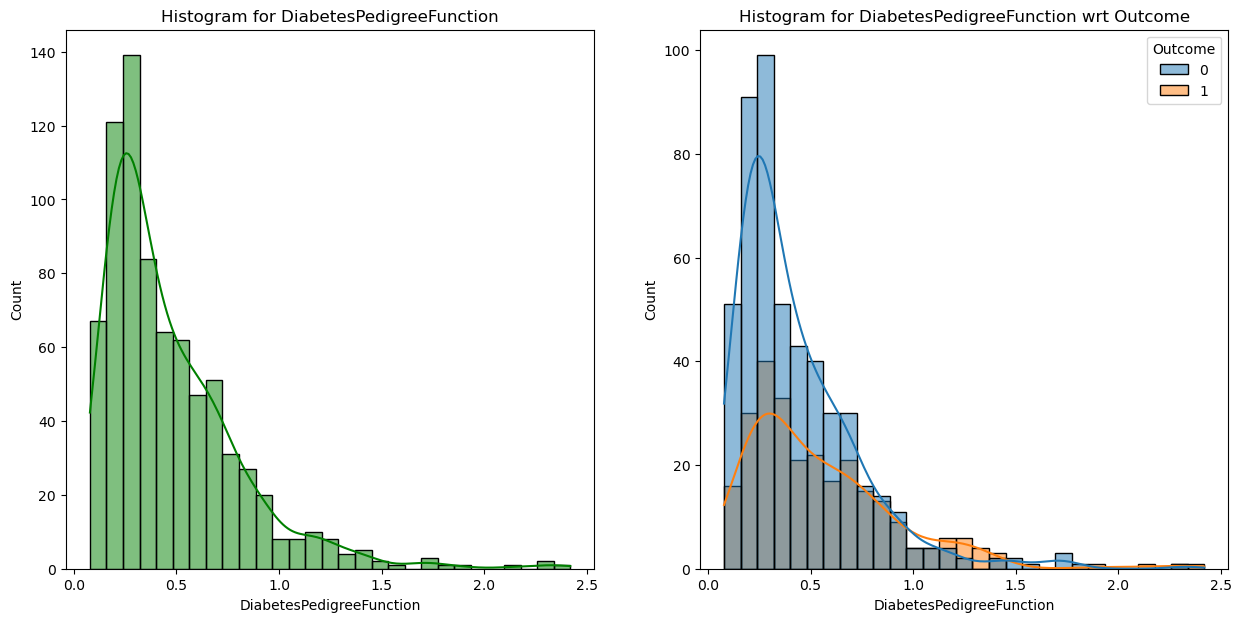

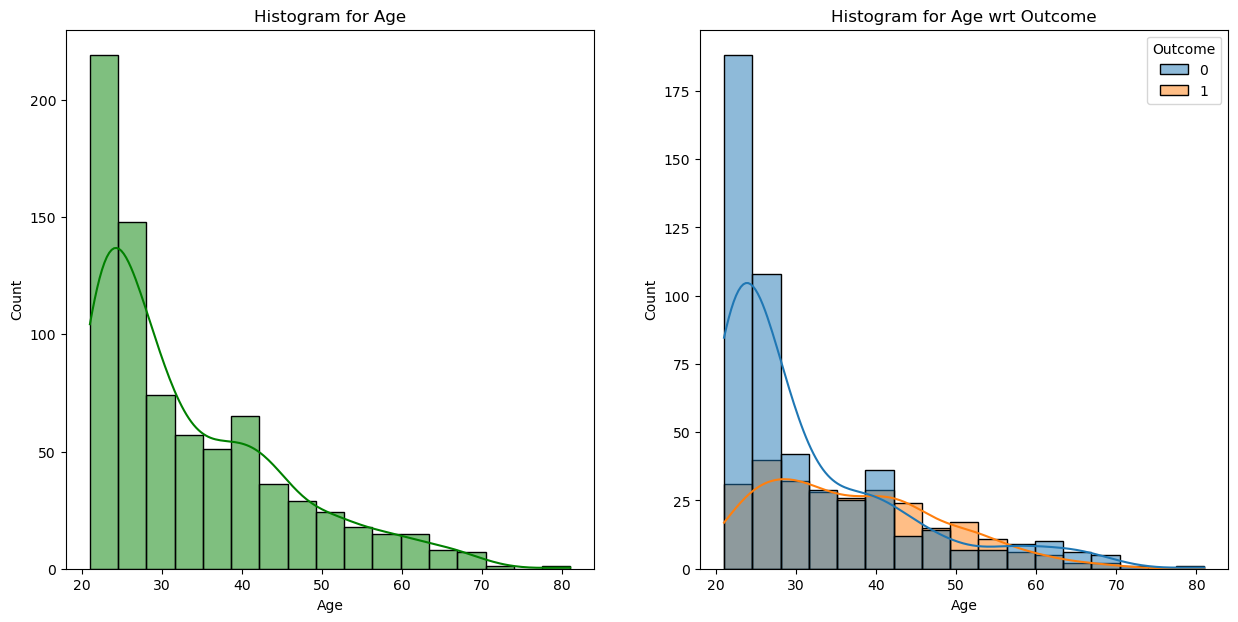

In [10]:
# Univariate Analysis
for i in df.columns:
    if i != 'Outcome':
        fig, ax = plt.subplots(1,2,figsize=(15,7))
        plt.subplot(121)
        sns.histplot(data=df,x=i,kde=True,bins='fd',color='g')
        plt.title(f'Histogram for {i}')
        plt.subplot(122)
        sns.histplot(data=df,x=i,kde=True,bins='fd',hue='Outcome')
        plt.title(f'Histogram for {i} wrt Outcome')
        plt.show()


Multivariate Analysis

Q2) Preprocess the data by cleaning missing values, removing outliers, and transforming categorical
variables into dummy variables if necessary.

Q3) Split the dataset into a training set and a test set. Use a random seed to ensure reproducibility.

Q4) Use a decision tree algorithm, such as ID3 or C4.5, to train a decision tree model on the training set. Use
cross-validation to optimize the hyperparameters and avoid overfitting.

Q5) Evaluate the performance of the decision tree model on the test set using metrics such as accuracy,
precision, recall, and F1 score. Use confusion matrices and ROC curves to visualize the results.

Q6) Interpret the decision tree by examining the splits, branches, and leaves. Identify the most important
variables and their thresholds. Use domain knowledge and common sense to explain the patterns and
trends.

Q7) Validate the decision tree model by applying it to new data or testing its robustness to changes in the
dataset or the environment. Use sensitivity analysis and scenario testing to explore the uncertainty and
risks.

By following these steps, you can develop a comprehensive understanding of decision tree modeling and
its applications to real-world healthcare problems. Good luck!